In [1]:
import numpy as np

In [2]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [3]:
type(a)

numpy.ndarray

**В numpy все операции векторизованные!**

In [5]:
a + 2

array([3, 4, 5])

In [7]:
a_python = [1, 2, 3]

a_python_new = []
for x in a_python:
    a_python_new.append(x + 2)
    
a_python_new

[3, 4, 5]

In [11]:
a = np.arange(10**7)
b = list(range(10**7))

In [14]:
%%timeit
np.sum(a)

7.63 ms ± 499 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
%%timeit
sum(b)

60.7 ms ± 1.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [17]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [22]:
type(1)

int

In [20]:
type(1.)

float

In [23]:
np.random.rand(5) # из [0,1] 5 рандомных чисел 

array([0.05958582, 0.53225519, 0.64252311, 0.88146158, 0.17978973])

In [26]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


### Логические срезы

In [30]:
a = np.array([1, 10, -2, 0, -100, -5])

a > 0 # булевский массив (из True и False)

array([ True,  True, False, False, False, False])

In [32]:
a[1:3]

array([10, -2])

In [33]:
a[a > 0]

array([ 1, 10])

Вывести все минимальные элементы в списке

In [36]:
a = np.array([10, 20, 10, 30, 40]) # [10, 10]

a[a == np.min(a)]

array([10, 10])

### Размерности

In [37]:
a = np.array([1, 10, -2, 0, -100, -5])

a.shape

(6,)

In [39]:
mat = np.array(
    [
        [1, 2], 
        [2, 3],
        [8, 9]
    ]
)

mat.shape

(3, 2)

In [41]:
mat[1, 1]

3

In [44]:
mat.reshape(2, 3)

array([[1, 2, 2],
       [3, 8, 9]])

In [45]:
mat.reshape(2, -1) # сам додумал тройку

array([[1, 2, 2],
       [3, 8, 9]])

### Решаем задачки на numpy

In [66]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0, 6])

In [67]:
x == 0

array([False, False,  True, False,  True,  True, False, False,  True,
       False])

In [68]:
shifted_array = np.hstack((1, x))

In [69]:
shifted_array == 0

array([False, False, False,  True, False,  True,  True, False, False,
        True, False])

In [70]:
bool_array = (shifted_array == 0)[:-1]

In [72]:
np.max(x[bool_array])

6

In [75]:
from typing import List


def find_max_after_zero(x: List[int]) -> int:
    """
    Это функция, которая ищет максимальный элемент среди тех, что стоят после нуля
    
    Parameters
    ----------
        x: array of integers
        
    Returns
    -------
        maximum
    
    """
    shifted_x = np.hstack((1, x))
    bool_array = (shifted_x == 0)[:-1]
    
    return np.max(x[bool_array])

#### Задача №2: нормировка

In [81]:
X = np.array(
    [
        [24, 170, 70000],
        [22, 180, 100000],
        [35, 182, 20000],
        [16, 160, 10000]
    ]
)

In [83]:
(X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

array([[0.42105263, 0.45454545, 0.66666667],
       [0.31578947, 0.90909091, 1.        ],
       [1.        , 1.        , 0.11111111],
       [0.        , 0.        , 0.        ]])

### Здесь мы пошли в предыдущий семинар

### 1. Визуализация

In [95]:
# библиотеки для визуализации и картинок
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # можно выбрать для графиков свой любимый стиль
%matplotlib inline

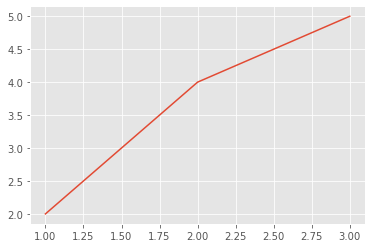

In [96]:
plt.plot([1, 2, 3], [2, 4, 5])

In [97]:
import scipy.stats as sts

Text(0, 0.5, 'Плотность распределения')

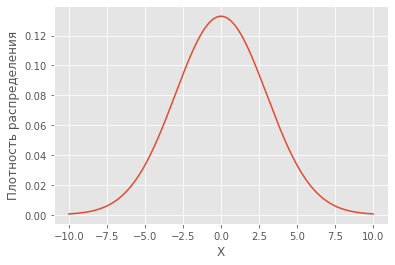

In [98]:
norm_ = sts.norm(0, 3)

x = np.linspace(-10, 10, 10000)
pdfs = norm_.pdf(x) # плотность распределения

plt.plot(x, pdfs)
plt.xlabel('X')
plt.ylabel('Плотность распределения')

### 2. Зерна

Хотим воспроизводить код!

In [113]:
norm_ = sts.norm(0, 3)

norm_.rvs(5, random_state=43)

### ..... 
### score = 0.99

array([ 0.77219978, -2.7254443 , -1.13550932, -1.6047468 ,  2.57422004])

### Задачка 4 (про спам)

In [115]:
poiss_ = sts.poisson(3)

In [117]:
# 1 - F(5) = 1 - P(X <= 5) = P(X > 5)
1 - poiss_.cdf(5)

0.08391794203130343

### Задачка 7 (нейросетки)

In [120]:
n = 10**5

T1 = sts.uniform(1, 2).rvs(n)
T2 = sts.uniform(1, 2).rvs(n)

T = sts.expon(scale=1/0.3).rvs(n)

In [124]:
usl1 = (T1 >= T) & (T2 < T)
usl2 = (T1 < T) & (T2 >= T)

usl = usl1 | usl2

In [132]:
len(T[usl])

11083

In [134]:
itog = T[usl]

In [135]:
len(itog)

11083

In [137]:
len(itog[itog <= 1.5])

2085

In [138]:
len(itog[itog <= 1.5]) / len(itog)

0.18812595867544887